<a href="https://colab.research.google.com/github/ryandeering/neural-networks-with-tensorflow/blob/main/Applied_Deep_Learning_and_AI_CA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Applied Deep Learning and AI CA1 - Ryan Deering X00144631**


> Features: 81

> Seed: 93

> Errors: 0.37



# Introduction

> text here

# Imports

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import*

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets.samples_generator import make_classification
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GaussianNoise

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Creating the dataset


In [3]:
# fix random seed for reproducibility
np.random.seed(93)
tf.random.set_seed(93)

features = 81
classes = 5
n = 200000
errors = 0.37
redundant = int(features/4)



# Classification dataset
X, y = make_classification(n_samples=n, n_classes=classes, n_features=features, \
                           random_state = 1,n_informative =20, flip_y=errors, \
                           n_redundant=redundant)

# reshape y to 2D array, it needs to be to append
y = np.reshape(y, (-1, 1))

#add y to x
Xy = np.concatenate((X,y),axis=1)

np.savetxt("MyCAData.csv", Xy, delimiter=",")

print(Xy[:5])

data = pd.read_csv("MyCAData.csv")

data = shuffle(data,random_state=np.random.seed(93))
dataset = data.values



X = dataset[:,0:81]
y = dataset[:,81]



[[ 1.74150016e+00 -8.83031032e-01  5.15039760e+00 -6.14713722e-01
  -1.49496606e+00  3.94407438e-01  3.16551453e+00 -4.39475064e-01
   7.64470346e-01  5.13090429e+00  2.09731451e+00  1.73190612e+00
   2.25465569e-02  3.17321133e-01  5.16623656e+00 -1.43812143e+00
   3.36229631e+00 -1.24525818e+00  7.49454412e-01 -2.30524296e-01
   1.54237799e-01 -3.52668137e+00 -1.58165333e+00  4.95695617e-01
  -5.03579844e+00  8.57433644e-01 -1.02184063e+00 -1.04969390e+00
  -7.56610008e+00 -3.61632048e-01  1.24776498e+00  2.01122719e+00
  -3.32650638e-01  1.19197325e+01 -1.44662184e+00  2.79696582e+00
   5.75411069e+00 -3.93674634e+00 -3.55540072e+00  2.48006512e+01
  -1.70193063e-01 -7.40713014e-01  1.44036209e+00 -1.74731598e+01
   2.57983788e+00  1.44049492e+00  7.69514080e-01  2.46443699e+00
  -4.71985475e+00  2.22882217e-02 -7.28912521e-01  9.05587594e-01
  -4.31618442e+00 -3.35490383e-01  1.11727682e+01 -6.44808800e-01
   4.54505520e+00 -3.59962633e+00 -1.66740427e+01  4.15018912e-01
  -1.34804

The dataset is generated, but we need to look into visualization and exploration. (more on the actual generation here)

# Data Exploration and Visualization

In [ ]:
print("Skek and description:\n--------------------------------")
print(data.skew())
print("Data Description:\n---------------------------------")
print(data.describe())

Skek and description:
--------------------------------
1.741500159374914869e+00     0.094439
-8.830310323752997848e-01    0.003107
5.150397599052741526e+00     0.017192
-6.147137221102183524e-01    0.001608
-1.494966064470657496e+00    0.000901
                               ...   
8.746234782349532333e-01     0.016211
2.594096506854321582e+00    -0.038771
-2.847202394579646800e-02   -0.002147
3.355897343794845417e-02    -0.007233
0.000000000000000000e+00     0.004446
Length: 82, dtype: float64
Data Description:
---------------------------------
       1.741500159374914869e+00  ...  0.000000000000000000e+00
count             199999.000000  ...             199999.000000
mean                  -0.208931  ...                  1.994110
std                    2.709402  ...                  1.414802
min                  -13.435483  ...                  0.000000
25%                   -2.029499  ...                  1.000000
50%                   -0.279815  ...                  2.000000
75%    

In [ ]:
print(data.isnull().values.any())

print(data.isnull().sum().sum())

False
0


In [ ]:
print("Correlation Table")
data.corr().unstack().sort_values().drop_duplicates()

Correlation Table


5.754110692017115447e+00   -1.367784248246747048e+01   -0.609475
-7.289125213895145672e-01  -3.936746338261522649e+00   -0.595697
3.362296305053952938e+00   2.796965820112849332e+00    -0.586611
                           -1.049693897491815076e+00   -0.474918
5.754110692017115447e+00   -1.667404267932963435e+01   -0.468973
                                                          ...   
-1.581653329610475556e+00  -7.289125213895145672e-01    0.516781
-3.599626329004463443e+00  -3.969862023595022826e+00    0.543980
1.247764984449472925e+00   4.545055204757896483e+00     0.598849
-3.599626329004463443e+00  -1.747315984588589544e+01    0.616291
1.741500159374914869e+00   1.741500159374914869e+00     1.000000
Length: 3322, dtype: float64

# Data Preprocessing

In [4]:
X = X / X.max(axis=0)
encoded_y = to_categorical(y)



#Model exploration to determine network topology

Epoch 1/10
4188/4188 [==============================] - 9s 2ms/step - loss: 1.4113 - acc: 0.4450 - val_loss: 1.2475 - val_acc: 0.5912
Epoch 2/10
4188/4188 [==============================] - 8s 2ms/step - loss: 1.2304 - acc: 0.6034 - val_loss: 1.2201 - val_acc: 0.6200
Epoch 3/10
4188/4188 [==============================] - 8s 2ms/step - loss: 1.2032 - acc: 0.6239 - val_loss: 1.2062 - val_acc: 0.6296
Epoch 4/10
4188/4188 [==============================] - 8s 2ms/step - loss: 1.1887 - acc: 0.6330 - val_loss: 1.2005 - val_acc: 0.6360
Epoch 5/10
4188/4188 [==============================] - 8s 2ms/step - loss: 1.1827 - acc: 0.6400 - val_loss: 1.1968 - val_acc: 0.6398
Epoch 6/10
4188/4188 [==============================] - 8s 2ms/step - loss: 1.1786 - acc: 0.6427 - val_loss: 1.1955 - val_acc: 0.6409
Epoch 7/10
4188/4188 [==============================] - 7s 2ms/step - loss: 1.1721 - acc: 0.6450 - val_loss: 1.1944 - val_acc: 0.6408
Epoch 8/10
4188/4188 [==============================] - 7s 2ms

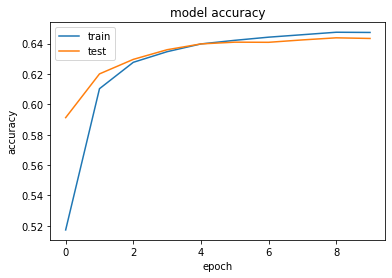

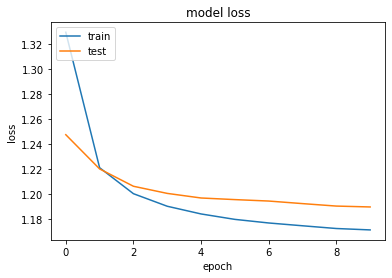

In [ ]:
# define and fit the final model
model = Sequential()
model.add(Dense(50, input_dim=81, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=10)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 1:** Starting off with the default values, we can see that the network is suffering from overfitting after around 10 epochs of learning. The training set has quickly trained with a low amount of loss, but the test set, which is the most important set to factor in when beginning to evaluate a network's topology, is suffering from low accuracy and high loss. This means essentially that the model is making really poor predictions on data it has never seen before.

While this is a poor network, let's evaluate what we will keep to from the example from the Make Classification example for generating the data.

We will continue to use the data split, to determine overfitting and underfitting in our model. We will also keep our output layer's nodes at 5, which determines the amount of classes we have for the CA, and to produce the final result, as well as the activation function being softmax as this is a multi-class classification problem where we need to normalize the output of the network over several predicted output classes, being 5 of them. 

Epoch 1/10
4188/4188 [==============================] - 9s 2ms/step - loss: 1.3526 - acc: 0.4863 - val_loss: 1.1727 - val_acc: 0.6331
Epoch 2/10
4188/4188 [==============================] - 8s 2ms/step - loss: 1.1544 - acc: 0.6423 - val_loss: 1.1491 - val_acc: 0.6498
Epoch 3/10
4188/4188 [==============================] - 9s 2ms/step - loss: 1.1267 - acc: 0.6544 - val_loss: 1.1327 - val_acc: 0.6564
Epoch 4/10
4188/4188 [==============================] - 9s 2ms/step - loss: 1.1082 - acc: 0.6626 - val_loss: 1.1251 - val_acc: 0.6619
Epoch 5/10
4188/4188 [==============================] - 9s 2ms/step - loss: 1.0963 - acc: 0.6693 - val_loss: 1.1227 - val_acc: 0.6643
Epoch 6/10
4188/4188 [==============================] - 10s 2ms/step - loss: 1.0892 - acc: 0.6705 - val_loss: 1.1207 - val_acc: 0.6654
Epoch 7/10
4188/4188 [==============================] - 9s 2ms/step - loss: 1.0794 - acc: 0.6752 - val_loss: 1.1143 - val_acc: 0.6701
Epoch 8/10
4188/4188 [==============================] - 10s 2

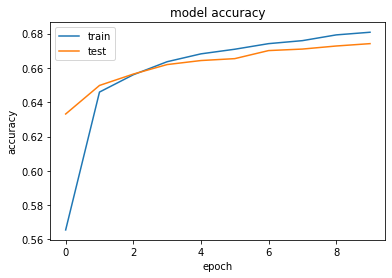

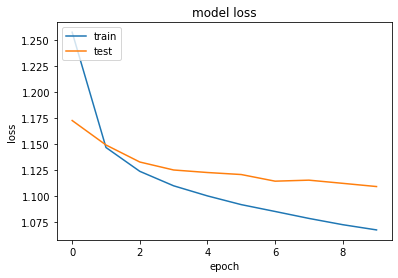

In [ ]:
# define and fit the final model
model = Sequential()
model.add(Dense(100, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(50, kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=10)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 2:** *Increases to capacity and depth of the network.* An extra layer has been added to see if it makes a difference to the training of the dataset. The answer is: yes, it does. We can see that on our first epoch of Investigation 1, we end with a loss of 1.6238 and an accuracy of 0.4674. In that same position in Investigation, we end our first epoch with a loss of 1.2791 and an accuracy of 0.5506. However, our network is still seriously overfitted. 

We can see that increasing capacity and depth does help to help solve a difficult problem. 

Epoch 1/10
4188/4188 [==============================] - 70s 17ms/step - loss: 1.2763 - acc: 0.5548 - val_loss: 1.1422 - val_acc: 0.6558
Epoch 2/10
4188/4188 [==============================] - 71s 17ms/step - loss: 1.1083 - acc: 0.6676 - val_loss: 1.1212 - val_acc: 0.6730
Epoch 3/10
4188/4188 [==============================] - 69s 16ms/step - loss: 1.0658 - acc: 0.6819 - val_loss: 1.1115 - val_acc: 0.6783
Epoch 4/10
4188/4188 [==============================] - 69s 16ms/step - loss: 1.0252 - acc: 0.6901 - val_loss: 1.1194 - val_acc: 0.6769
Epoch 5/10
4188/4188 [==============================] - 68s 16ms/step - loss: 0.9767 - acc: 0.6968 - val_loss: 1.1492 - val_acc: 0.6693
Epoch 6/10
4188/4188 [==============================] - 69s 17ms/step - loss: 0.9128 - acc: 0.7038 - val_loss: 1.1934 - val_acc: 0.6576
Epoch 7/10
4188/4188 [==============================] - 87s 21ms/step - loss: 0.8217 - acc: 0.7205 - val_loss: 1.2730 - val_acc: 0.6372
Epoch 8/10
4188/4188 [==========================

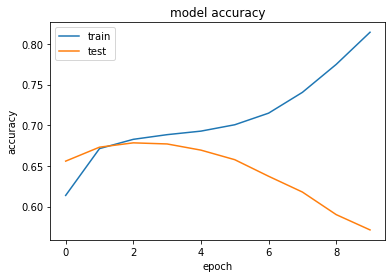

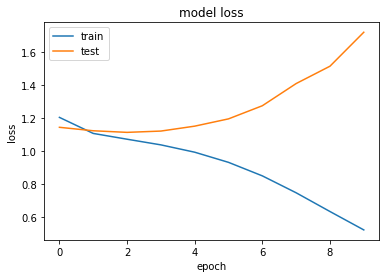

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(2000, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(500 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=10)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 3:** *Increases to the capacity of the network.* We have kept our additional hidden layer in Investigation 2 in an attempt to see if our accuracy would increase while not being overly concerned with the amount of loss generated. The increase of capacity almost certainly enabled a higher accuracy, but at the cost of much, much higher overfitting, and much more quickly as well. This can be seen in both the model loss and accuracy graphs, as the training and test sets begin to diverge at a rabid rate past the 4th epoch of training. This is not good at all regarding the test set, as it means our predictions will be absolutely terrible.

Epoch 1/10
4188/4188 [==============================] - 297s 71ms/step - loss: 1.2657 - acc: 0.5593 - val_loss: 1.1074 - val_acc: 0.6663
Epoch 2/10
4188/4188 [==============================] - 301s 72ms/step - loss: 1.0812 - acc: 0.6744 - val_loss: 1.0889 - val_acc: 0.6754
Epoch 3/10
4188/4188 [==============================] - 303s 72ms/step - loss: 1.0472 - acc: 0.6858 - val_loss: 1.0843 - val_acc: 0.6755
Epoch 4/10
4188/4188 [==============================] - 302s 72ms/step - loss: 1.0111 - acc: 0.6952 - val_loss: 1.0975 - val_acc: 0.6746
Epoch 5/10
4188/4188 [==============================] - 303s 72ms/step - loss: 0.9632 - acc: 0.7041 - val_loss: 1.1296 - val_acc: 0.6658
Epoch 6/10
4188/4188 [==============================] - 306s 73ms/step - loss: 0.8864 - acc: 0.7167 - val_loss: 1.1840 - val_acc: 0.6557
Epoch 7/10
4188/4188 [==============================] - 301s 72ms/step - loss: 0.7807 - acc: 0.7375 - val_loss: 1.2821 - val_acc: 0.6358
Epoch 8/10
4188/4188 [===================

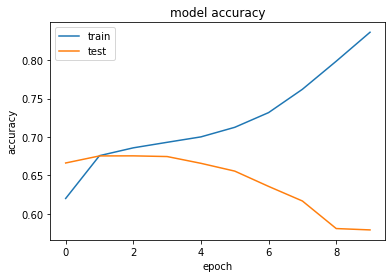

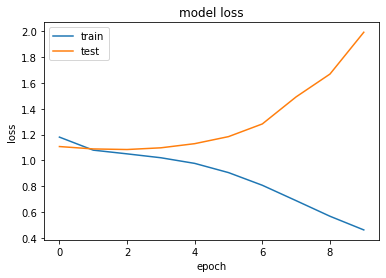

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(2000, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1500 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(800 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=10)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 4:** *Increases to the capacity and depth of the network.* We have added an additional hidden layer to see if this will improve our accuracy for a total for three hidden layers sandwiched between the input and output layers. The extra layer seems to improve accuracy but again, it massively overfits once again. The overall training loss has increased from 1.71 to 1.99, which is terrible for a very minute difference in accuracy with the training set. Our model is learning too good with the current set of layers and capacity, to the point where it is harming data not in the training set. This will make for terrible predictions.

Epoch 1/5
4188/4188 [==============================] - 185s 44ms/step - loss: 1.2698 - acc: 0.5507 - val_loss: 1.1017 - val_acc: 0.6637
Epoch 2/5
4188/4188 [==============================] - 182s 43ms/step - loss: 1.0758 - acc: 0.6731 - val_loss: 1.0786 - val_acc: 0.6759
Epoch 3/5
4188/4188 [==============================] - 182s 43ms/step - loss: 1.0480 - acc: 0.6853 - val_loss: 1.0748 - val_acc: 0.6742
Epoch 4/5
4188/4188 [==============================] - 182s 43ms/step - loss: 1.0223 - acc: 0.6951 - val_loss: 1.0774 - val_acc: 0.6741
Epoch 5/5
4188/4188 [==============================] - 183s 44ms/step - loss: 0.9946 - acc: 0.7030 - val_loss: 1.0937 - val_acc: 0.6715


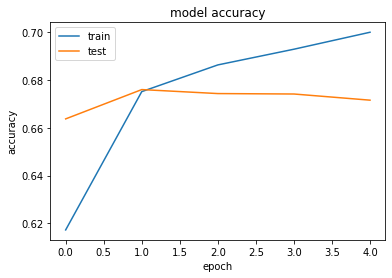

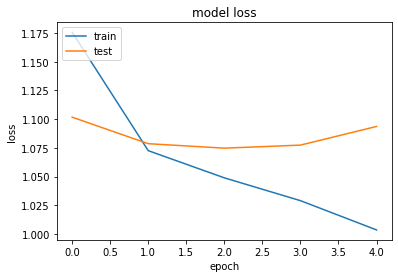

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1900, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1300 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(700 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=5)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 5:** *Decreases to the capacity of the network. Increases to the depth of the network.* We have tried to add an additional layer and decreased the epochs of the training set. We seem to be getting a recurring result, where the loss seems to rabidly increase once hitting around 70% accuracy. I am inclined to believe this is because of the *flip_y* variable of the Sklearn make_classification function, inducing artificial errors in the dataset. Because there is artificial errors in the dataset, we can only achieve an accuracy high enough before there is rabid overfitting of the model. We do not want overfitting, so we will look to use early stopping in the future to prevent this.  

Epoch 1/5
4188/4188 [==============================] - 109s 26ms/step - loss: 1.2680 - acc: 0.5490 - val_loss: 1.0966 - val_acc: 0.6638
Epoch 2/5
4188/4188 [==============================] - 112s 27ms/step - loss: 1.0726 - acc: 0.6736 - val_loss: 1.0767 - val_acc: 0.6745
Epoch 3/5
4188/4188 [==============================] - 110s 26ms/step - loss: 1.0470 - acc: 0.6853 - val_loss: 1.0674 - val_acc: 0.6774
Epoch 4/5
4188/4188 [==============================] - 115s 27ms/step - loss: 1.0278 - acc: 0.6937 - val_loss: 1.0768 - val_acc: 0.6730
Epoch 5/5
4188/4188 [==============================] - 114s 27ms/step - loss: 1.0098 - acc: 0.7001 - val_loss: 1.0746 - val_acc: 0.6760


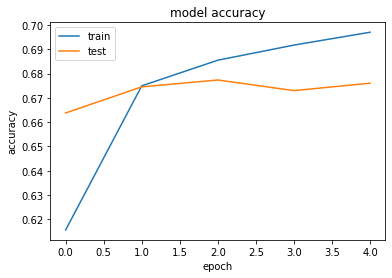

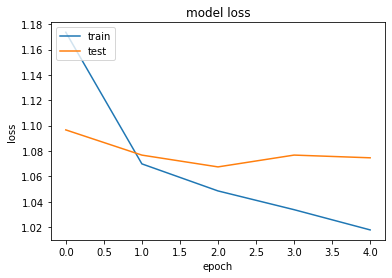

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=5)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 6:** *Decreases to the capacity of the network..* We have kept our existing hidden layers but decreased the capacity of the network to see if we can get a better result. Does seem to wield a better result with the third epoch than Investigation 5, with val_acc and val_loss being slightly better. Marginally better, but better regardless. We can see some slight overfitting but not a huge amount that can't be stopped with early stopping. 

Epoch 1/4
4188/4188 [==============================] - 112s 27ms/step - loss: 1.2936 - acc: 0.5288 - val_loss: 1.0910 - val_acc: 0.6649
Epoch 2/4
4188/4188 [==============================] - 110s 26ms/step - loss: 1.0738 - acc: 0.6720 - val_loss: 1.0731 - val_acc: 0.6746
Epoch 3/4
4188/4188 [==============================] - 109s 26ms/step - loss: 1.0496 - acc: 0.6845 - val_loss: 1.0648 - val_acc: 0.6769
Epoch 4/4
4188/4188 [==============================] - 109s 26ms/step - loss: 1.0323 - acc: 0.6931 - val_loss: 1.0677 - val_acc: 0.6767


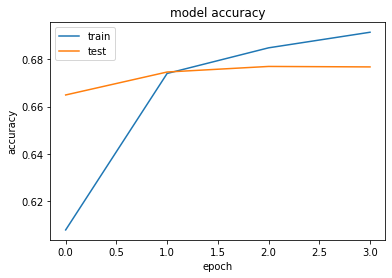

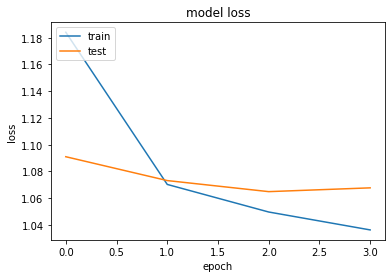

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(100 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=4)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 7:** *Increase in capacity and depth to the network* We have added another hidden layer to see if we can yield a better result before, changing the epochs to 4 for early stopping. Results are mixed, it seems to be performing better on the the training set, but performing worse on the test set compared to **Investigation 6**. The test set is really what matters, so we can say at this point that adding another layer to the network is not performant or better for the network at this time. 

Epoch 1/10
4188/4188 [==============================] - 97s 23ms/step - loss: 1.2670 - acc: 0.5535 - val_loss: 1.1100 - val_acc: 0.6647
Epoch 2/10
4188/4188 [==============================] - 96s 23ms/step - loss: 1.0805 - acc: 0.6739 - val_loss: 1.0907 - val_acc: 0.6761
Epoch 3/10
4188/4188 [==============================] - 97s 23ms/step - loss: 1.0471 - acc: 0.6865 - val_loss: 1.0855 - val_acc: 0.6771
Epoch 4/10
4188/4188 [==============================] - 99s 24ms/step - loss: 1.0111 - acc: 0.6949 - val_loss: 1.0939 - val_acc: 0.6762
Epoch 5/10
4188/4188 [==============================] - 99s 24ms/step - loss: 0.9617 - acc: 0.7037 - val_loss: 1.1208 - val_acc: 0.6694
Epoch 6/10
4188/4188 [==============================] - 99s 24ms/step - loss: 0.8865 - acc: 0.7147 - val_loss: 1.1887 - val_acc: 0.6563
Epoch 7/10
4188/4188 [==============================] - 100s 24ms/step - loss: 0.7774 - acc: 0.7345 - val_loss: 1.2850 - val_acc: 0.6408
Epoch 8/10
4188/4188 [=========================

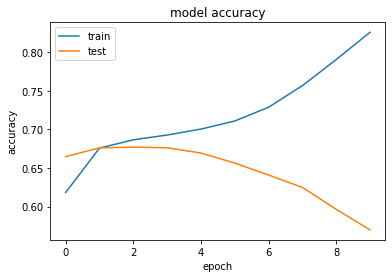

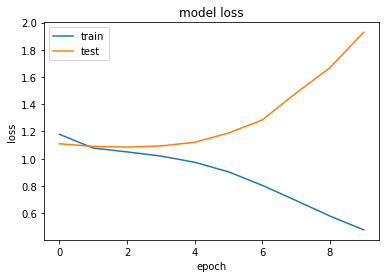

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1400, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=10)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 8:** *Decreases to depth and capacity.* We have removed the hidden layer from **Investigation 7** and upped the epochs of the network once again. As we can tell once again, the overfitting seems to occur around the fourth to fifth epoch. This is beginning to be a constant, around the 67% - 70% accuracy mark. However, performance does differ compared to **Investigation 7**. We can see around that third epoch, that performance is slightly better with a higher accuracy than the prior model, but the loss in this test set is slightly worse in this model. Accuracy is the key, so this model is technically better around that epoch before overfitting starts. But we should take that higher loss in mind. 

Epoch 1/10
4188/4188 [==============================] - 47s 11ms/step - loss: 1.2667 - acc: 0.5497 - val_loss: 1.1030 - val_acc: 0.6639
Epoch 2/10
4188/4188 [==============================] - 47s 11ms/step - loss: 1.0784 - acc: 0.6726 - val_loss: 1.0838 - val_acc: 0.6761
Epoch 3/10
4188/4188 [==============================] - 48s 11ms/step - loss: 1.0493 - acc: 0.6852 - val_loss: 1.0760 - val_acc: 0.6776
Epoch 4/10
4188/4188 [==============================] - 48s 11ms/step - loss: 1.0233 - acc: 0.6945 - val_loss: 1.0795 - val_acc: 0.6782
Epoch 5/10
4188/4188 [==============================] - 47s 11ms/step - loss: 0.9943 - acc: 0.7004 - val_loss: 1.0955 - val_acc: 0.6725
Epoch 6/10
4188/4188 [==============================] - 48s 11ms/step - loss: 0.9622 - acc: 0.7054 - val_loss: 1.1258 - val_acc: 0.6656
Epoch 7/10
4188/4188 [==============================] - 48s 11ms/step - loss: 0.9102 - acc: 0.7143 - val_loss: 1.1551 - val_acc: 0.6608
Epoch 8/10
4188/4188 [==========================

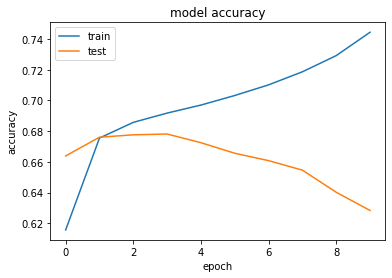

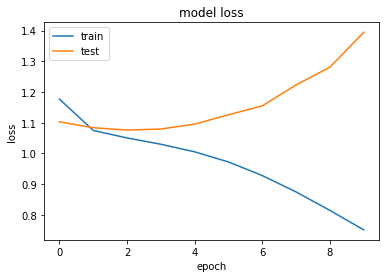

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(800, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(400 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=10)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Investigation 9:** *Decreases to capacity* Very similar performance to Investigation 8, but with less accuracy and higher loss in the training set, marginal gains in the test set. Not much changed beyond that.  

Epoch 1/5
4188/4188 [==============================] - 28s 7ms/step - loss: 1.2751 - acc: 0.5425 - val_loss: 1.1138 - val_acc: 0.6566
Epoch 2/5
4188/4188 [==============================] - 26s 6ms/step - loss: 1.0890 - acc: 0.6654 - val_loss: 1.0905 - val_acc: 0.6726
Epoch 3/5
4188/4188 [==============================] - 25s 6ms/step - loss: 1.0555 - acc: 0.6830 - val_loss: 1.0746 - val_acc: 0.6788
Epoch 4/5
4188/4188 [==============================] - 27s 6ms/step - loss: 1.0272 - acc: 0.6921 - val_loss: 1.0799 - val_acc: 0.6790
Epoch 5/5
4188/4188 [==============================] - 26s 6ms/step - loss: 1.0018 - acc: 0.6984 - val_loss: 1.0943 - val_acc: 0.6736


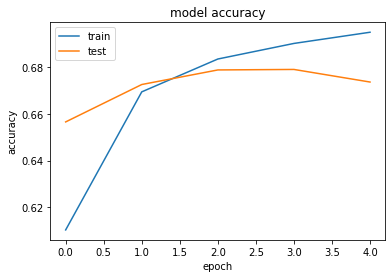

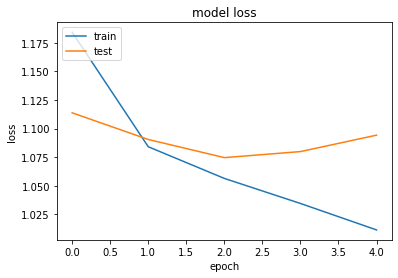

In [17]:

# define and fit the final model
model = Sequential()
model.add(Dense(700, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(300 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(100 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=5)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Investigation 10: idk write shit later for this

# Determining the best model from the results we have

We have made 10 investigations, and must determine the best model we have to use.

Let's establish criteria:

*   We have to achieve to a bias-tradeoff, i.e a perfect balance between underfitting and overfitting. 
*   Our focus is on accuracy, with a bias towards the accuracy of the test set, because this is we are making the actual predictions on. 
*   We are working off basically marginal gains, most models perform the same beyond a certain point. They're all around the same ballpark performance we should expect.

Let's discuss what we noticed. The network struggles with this dataset beyond 67-70%. This is due to the artificial errors induced in the dataset, that being the flip_y parameter. Let's examine the sci-py documentation for this parameter:

**"The fraction of samples whose class is assigned randomly. Larger values introduce noise in the labels and make the classification task harder."**

This makes a lot of sense as to why our model won't generalize beyond a certain point, that being the 67%-70% accuracy mark. Our error is 0.37. 

To determine the best model, I will take a look at the results in Microsoft Excel, examining the best performing model results before noticable overfitting begins to occur. 

I examined every investigation, taking their best results before the overfitting starts in an extreme way.

The idea is to get the highest accuracy between the two training and test variables, but also the least loss between the training and test variables. 


I settled on **Investigation 6**, due to it having little loss between the two sets and an accuracy of just over 70%, being the third highest of the investigations overall. However, the two investigations above it (*I ruled out Investigation 3 due to overfitting*) have a higher variance between the training sets and test sets, so Investigation 6 is a well-performing, non-biased as possible model. The bias-trade off has been made, and 6 is the winner.

[I have included the link to the Google Sheets here. ](https://docs.google.com/spreadsheets/d/1mKmxhN-QYXAiXuvJAhLo-uXzX8x79KeGLtaYGU-mBOM/edit?usp=sharing)



**To sum changes made:** 

**7 changes to the input layer**

**5 changes to the depth of the network**

**10 changes to the capacity of the network**

# Initial hyperparameter investigation 

We have our model? What do we do now? (more needed)

Epoch 1/10
2094/2094 [==============================] - 74s 35ms/step - loss: 1.2737 - acc: 0.5437 - val_loss: 1.0906 - val_acc: 0.6672
Epoch 2/10
2094/2094 [==============================] - 75s 36ms/step - loss: 1.0705 - acc: 0.6749 - val_loss: 1.0771 - val_acc: 0.6768
Epoch 3/10
2094/2094 [==============================] - 79s 38ms/step - loss: 1.0426 - acc: 0.6868 - val_loss: 1.0682 - val_acc: 0.6770
Epoch 4/10
2094/2094 [==============================] - 73s 35ms/step - loss: 1.0202 - acc: 0.6965 - val_loss: 1.0691 - val_acc: 0.6773
Epoch 5/10
2094/2094 [==============================] - 75s 36ms/step - loss: 0.9978 - acc: 0.7024 - val_loss: 1.0804 - val_acc: 0.6752
Epoch 6/10
2094/2094 [==============================] - 74s 35ms/step - loss: 0.9669 - acc: 0.7095 - val_loss: 1.1030 - val_acc: 0.6696
Epoch 7/10
2094/2094 [==============================] - 74s 36ms/step - loss: 0.9188 - acc: 0.7185 - val_loss: 1.1293 - val_acc: 0.6660
Epoch 8/10
2094/2094 [==========================

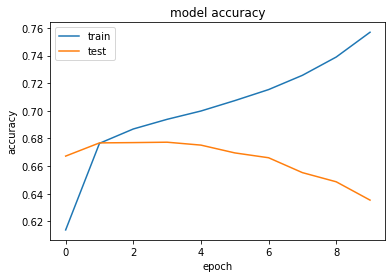

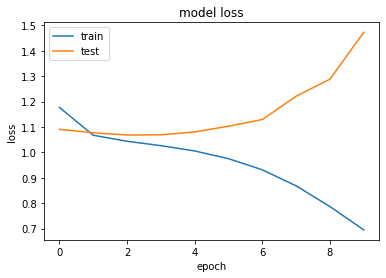

In [25]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=10,batch_size=64)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/15
1047/1047 [==============================] - 53s 50ms/step - loss: 1.2872 - acc: 0.5304 - val_loss: 1.0946 - val_acc: 0.6636
Epoch 2/15
1047/1047 [==============================] - 52s 50ms/step - loss: 1.0739 - acc: 0.6736 - val_loss: 1.0741 - val_acc: 0.6777
Epoch 3/15
1047/1047 [==============================] - 53s 50ms/step - loss: 1.0429 - acc: 0.6871 - val_loss: 1.0712 - val_acc: 0.6782
Epoch 4/15
1047/1047 [==============================] - 53s 51ms/step - loss: 1.0165 - acc: 0.6980 - val_loss: 1.0725 - val_acc: 0.6745
Epoch 5/15
1047/1047 [==============================] - 51s 49ms/step - loss: 0.9925 - acc: 0.7045 - val_loss: 1.0827 - val_acc: 0.6739
Epoch 6/15
1047/1047 [==============================] - 51s 49ms/step - loss: 0.9647 - acc: 0.7093 - val_loss: 1.1046 - val_acc: 0.6686
Epoch 7/15
1047/1047 [==============================] - 54s 51ms/step - loss: 0.9157 - acc: 0.7195 - val_loss: 1.1402 - val_acc: 0.6599
Epoch 8/15
1047/1047 [==========================

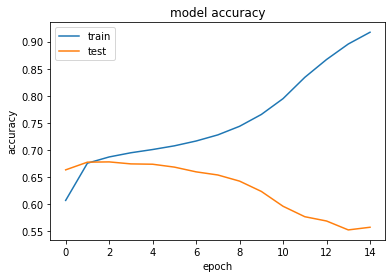

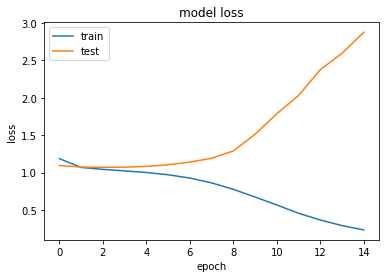

In [26]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=15,batch_size=128)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/20
524/524 [==============================] - 44s 84ms/step - loss: 1.3147 - acc: 0.5086 - val_loss: 1.1117 - val_acc: 0.6538
Epoch 2/20
524/524 [==============================] - 45s 86ms/step - loss: 1.0843 - acc: 0.6680 - val_loss: 1.0772 - val_acc: 0.6729
Epoch 3/20
524/524 [==============================] - 44s 83ms/step - loss: 1.0449 - acc: 0.6848 - val_loss: 1.0755 - val_acc: 0.6761
Epoch 4/20
524/524 [==============================] - 42s 81ms/step - loss: 1.0199 - acc: 0.6956 - val_loss: 1.0712 - val_acc: 0.6781
Epoch 5/20
524/524 [==============================] - 43s 82ms/step - loss: 0.9953 - acc: 0.7028 - val_loss: 1.0781 - val_acc: 0.6757
Epoch 6/20
524/524 [==============================] - 43s 83ms/step - loss: 0.9721 - acc: 0.7087 - val_loss: 1.0943 - val_acc: 0.6693
Epoch 7/20
524/524 [==============================] - 45s 85ms/step - loss: 0.9336 - acc: 0.7165 - val_loss: 1.1187 - val_acc: 0.6627
Epoch 8/20
524/524 [==============================] - 42s 81ms

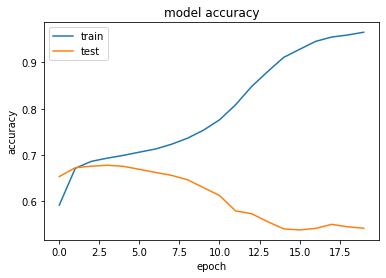

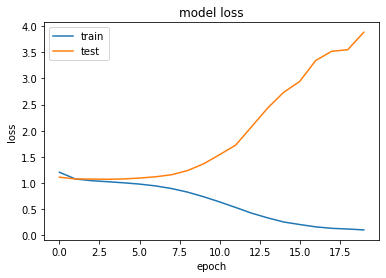

In [27]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=20,batch_size=256)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/25
262/262 [==============================] - 38s 144ms/step - loss: 1.3585 - acc: 0.4768 - val_loss: 1.1265 - val_acc: 0.6493
Epoch 2/25
262/262 [==============================] - 37s 142ms/step - loss: 1.1012 - acc: 0.6593 - val_loss: 1.0926 - val_acc: 0.6652
Epoch 3/25
262/262 [==============================] - 37s 142ms/step - loss: 1.0548 - acc: 0.6800 - val_loss: 1.0766 - val_acc: 0.6752
Epoch 4/25
262/262 [==============================] - 37s 141ms/step - loss: 1.0292 - acc: 0.6914 - val_loss: 1.0716 - val_acc: 0.6767
Epoch 5/25
262/262 [==============================] - 37s 141ms/step - loss: 1.0061 - acc: 0.6994 - val_loss: 1.0777 - val_acc: 0.6747
Epoch 6/25
262/262 [==============================] - 38s 143ms/step - loss: 0.9861 - acc: 0.7033 - val_loss: 1.0892 - val_acc: 0.6725
Epoch 7/25
262/262 [==============================] - 38s 144ms/step - loss: 0.9558 - acc: 0.7110 - val_loss: 1.1002 - val_acc: 0.6687
Epoch 8/25
262/262 [==============================] - 3

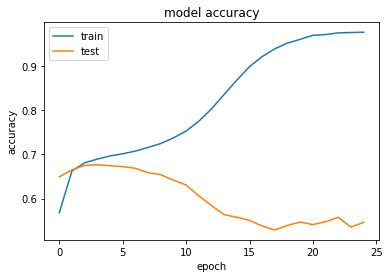

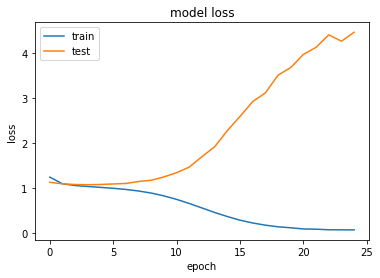

In [28]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=25,batch_size=512)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/30
131/131 [==============================] - 34s 259ms/step - loss: 1.4124 - acc: 0.4418 - val_loss: 1.1554 - val_acc: 0.6339
Epoch 2/30
131/131 [==============================] - 34s 259ms/step - loss: 1.1255 - acc: 0.6485 - val_loss: 1.1153 - val_acc: 0.6508
Epoch 3/30
131/131 [==============================] - 33s 255ms/step - loss: 1.0736 - acc: 0.6704 - val_loss: 1.0874 - val_acc: 0.6664
Epoch 4/30
131/131 [==============================] - 33s 254ms/step - loss: 1.0430 - acc: 0.6841 - val_loss: 1.0855 - val_acc: 0.6685
Epoch 5/30
131/131 [==============================] - 33s 255ms/step - loss: 1.0209 - acc: 0.6924 - val_loss: 1.0785 - val_acc: 0.6725
Epoch 6/30
131/131 [==============================] - 33s 255ms/step - loss: 1.0035 - acc: 0.6980 - val_loss: 1.0848 - val_acc: 0.6712
Epoch 7/30
131/131 [==============================] - 33s 254ms/step - loss: 0.9821 - acc: 0.7046 - val_loss: 1.0906 - val_acc: 0.6682
Epoch 8/30
131/131 [==============================] - 3

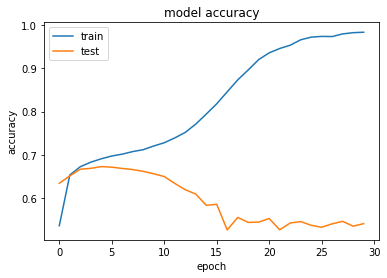

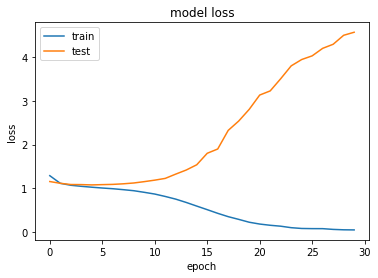

In [29]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=30,batch_size=1024)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/35
66/66 [==============================] - 33s 485ms/step - loss: 1.4692 - acc: 0.4012 - val_loss: 1.1962 - val_acc: 0.6066
Epoch 2/35
66/66 [==============================] - 32s 479ms/step - loss: 1.1609 - acc: 0.6295 - val_loss: 1.1378 - val_acc: 0.6457
Epoch 3/35
66/66 [==============================] - 32s 480ms/step - loss: 1.1021 - acc: 0.6613 - val_loss: 1.1046 - val_acc: 0.6598
Epoch 4/35
66/66 [==============================] - 32s 479ms/step - loss: 1.0664 - acc: 0.6734 - val_loss: 1.0974 - val_acc: 0.6609
Epoch 5/35
66/66 [==============================] - 32s 479ms/step - loss: 1.0412 - acc: 0.6831 - val_loss: 1.0943 - val_acc: 0.6653
Epoch 6/35
66/66 [==============================] - 32s 480ms/step - loss: 1.0252 - acc: 0.6892 - val_loss: 1.0908 - val_acc: 0.6656
Epoch 7/35
66/66 [==============================] - 31s 478ms/step - loss: 1.0050 - acc: 0.6956 - val_loss: 1.0960 - val_acc: 0.6685
Epoch 8/35
66/66 [==============================] - 32s 482ms/step - 

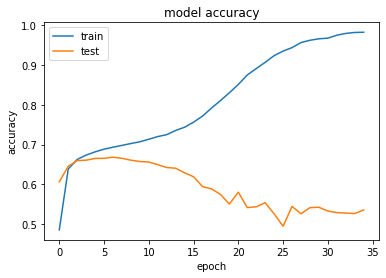

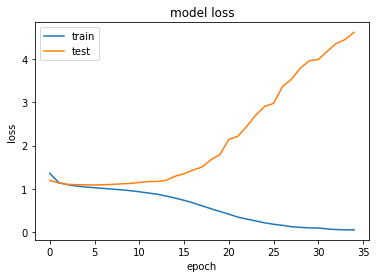

In [30]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=35,batch_size=2048)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/40
33/33 [==============================] - 32s 947ms/step - loss: 1.5293 - acc: 0.3611 - val_loss: 1.3097 - val_acc: 0.5181
Epoch 2/40
33/33 [==============================] - 31s 941ms/step - loss: 1.2569 - acc: 0.5592 - val_loss: 1.1775 - val_acc: 0.6231
Epoch 3/40
33/33 [==============================] - 31s 939ms/step - loss: 1.1452 - acc: 0.6380 - val_loss: 1.1401 - val_acc: 0.6457
Epoch 4/40
33/33 [==============================] - 31s 948ms/step - loss: 1.1025 - acc: 0.6603 - val_loss: 1.1225 - val_acc: 0.6522
Epoch 5/40
33/33 [==============================] - 31s 944ms/step - loss: 1.0785 - acc: 0.6704 - val_loss: 1.1073 - val_acc: 0.6589
Epoch 6/40
33/33 [==============================] - 31s 947ms/step - loss: 1.0538 - acc: 0.6795 - val_loss: 1.1021 - val_acc: 0.6618
Epoch 7/40
33/33 [==============================] - 31s 953ms/step - loss: 1.0342 - acc: 0.6852 - val_loss: 1.0957 - val_acc: 0.6648
Epoch 8/40
33/33 [==============================] - 31s 947ms/step - 

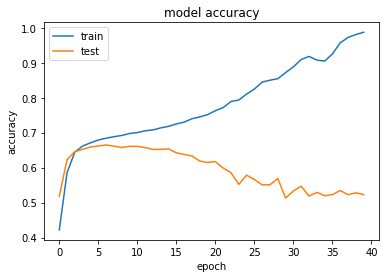

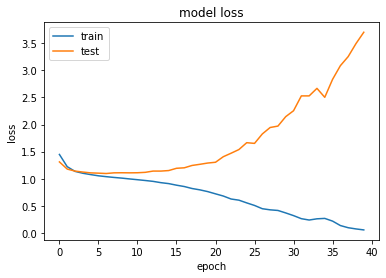

In [31]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=40,batch_size=4096)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

# define and fit the final model
model = Sequential()
model.add(Dense(1600, input_dim=81, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1000 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(200 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results = model.fit(X, encoded_y, validation_split=0.33,epochs=45,batch_size=8192)

# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/45
17/17 [==============================] - 28s 2s/step - loss: 1.5716 - acc: 0.3389 - val_loss: 1.4101 - val_acc: 0.4420
Epoch 2/45
17/17 [==============================] - 28s 2s/step - loss: 1.3659 - acc: 0.4752 - val_loss: 1.2798 - val_acc: 0.5417
Epoch 3/45
17/17 [==============================] - 27s 2s/step - loss: 1.2408 - acc: 0.5718 - val_loss: 1.1905 - val_acc: 0.6135
Epoch 4/45
17/17 [==============================] - 28s 2s/step - loss: 1.1588 - acc: 0.6309 - val_loss: 1.1557 - val_acc: 0.6356
Epoch 5/45
17/17 [==============================] - 28s 2s/step - loss: 1.1235 - acc: 0.6508 - val_loss: 1.1438 - val_acc: 0.6418
Epoch 6/45
17/17 [==============================] - 28s 2s/step - loss: 1.1036 - acc: 0.6601 - val_loss: 1.1270 - val_acc: 0.6524
Epoch 7/45
17/17 [==============================] - 28s 2s/step - loss: 1.0808 - acc: 0.6713 - val_loss: 1.1182 - val_acc: 0.6550
Epoch 8/45
17/17 [==============================] - 28s 2s/step - loss: 1.0656 - acc: 0.67